Sitchensis program demo
============

Below is a working example of *SITCHENSIS*. The file name of a tree in the same directory as this notebook is already entered for you.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### Import necessary modules

In [1]:
#System modules
import os
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pandas as pd
#import matplotlib as mp
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#Third party modules
import vpython as vp


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  Below is the working example program

### Enter the file name manually here:

In [2]:
#test relative path import
fullFileName = "MotherShip _Clean.xlsx"

In [3]:
workingDir = os.getcwd()
treeName = fullFileName.rsplit('.')[0] #For input file (excludes '.xlsx')
print(workingDir)
print(workingDir + "\\" + fullFileName)

C:\Users\rdk10\Desktop\Sitchensis-master\StichensisTest
C:\Users\rdk10\Desktop\Sitchensis-master\StichensisTest\MotherShip _Clean.xlsx


### Or by browsing for it here:

In [24]:
from ImportFunctions import getFileName
names = getFileName()

workingDir = names[0]
treeName = names[1]
fullFileName = names[2]

### This is where the data are imported. Take a quick look at the data to make sure there are no obvious errors. 

In [4]:
treeData = pd.read_excel(fullFileName, sheet_name = None)

In [5]:
treeData['main trunk et al.'].head()

,name,height,rel ht,diam,radius,dist,azi,ref,ref type,% dead,...,bark C,mean sap,sap A,sap B,sap C,mean heart,azi A,azi B,azi C,notes
0,M,60.4,NaN,34.1,NaN,0.1,177.0,tape,p2f,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mtop, sketchy, estimated"
1,M,59.4,NaN,34.1,NaN,0.1,177.0,tape,p2f,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,58.6,NaN,41.9,NaN,0.1,177.0,tape,p2f,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,57.0,NaN,49.7,NaN,0.1,177.0,tape,p2f,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M,55.0,NaN,49.1,NaN,0.1,177.0,tape,p2f,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
treeData['segments'].head()

,position,name,O/E,type,base ht,base diam,base radius,base dist,base azi,base ref,...,top dist,top azi,top ref,top ref type,% dead,s_fuzz,l_fuzz,midsegment dist,midsegment ref,notes
0,base,M-2,O,L,58.4,18.4,NaN,0.0,240.0,M,...,0.7,240,M,f2p,0,0,0,NaN,NaN,NaN
1,base,2-3,E,L,58.2,15.3,NaN,0.7,240.0,M,...,1.1,218,M,f2p,20,0,0,NaN,NaN,swollen used base diam for top
2,base,3-4,E,L,58.4,14.5,NaN,1.1,218.0,M,...,1.2,223,M,f2p,0,0,0,NaN,NaN,NaN
3,base,4-5,E,T,57.9,11.1,NaN,1.2,223.0,M,...,1.5,228,M@60.4,f2p,0,22,12,NaN,NaN,treetop
4,base,4-6,E,T,57.9,8.0,NaN,1.2,223.0,M,...,3.9,204,M@60.4,f2p,0,28,3,NaN,NaN,NaN


In [7]:
treeData['branches'].head()

,name,origin,O/E,L/D,ref radius,ref X,ref Y,ref Z,base ht,base diam,...,top ht,top diam,top radius,HD,slope,VD,% dead,midsegment dist,midsegment ref,notes
0,1,M,O,D,NaN,NaN,NaN,NaN,60.4,9.0,...,NaN,0.0,NaN,0.6,NaN,-2.5,100,NaN,NaN,"sketchy, diam estimated"
1,2,M,O,D,NaN,NaN,NaN,NaN,59.6,7.5,...,NaN,1.0,NaN,1.1,-25.0,NaN,100,NaN,NaN,"sketchy, diam estimated"
2,3,M,O,D,NaN,NaN,NaN,NaN,59.3,16.2,...,NaN,3.0,NaN,3.3,-26.0,NaN,100,NaN,NaN,NaN
3,4,M,O,D,NaN,NaN,NaN,NaN,58.9,7.3,...,NaN,4.0,NaN,0.9,-34.0,NaN,100,NaN,NaN,NaN
4,5,2,E,L,NaN,NaN,NaN,NaN,58.2,11.5,...,NaN,0.0,NaN,3.8,-33.0,NaN,40,NaN,NaN,F


## Set your output options here:

In [8]:
#Output options
suppressScatter = False
intFiles = False #Do you want to output intermediate calculation files??
runErrorScan = True
initErCheck = True

### Create an output directory if there is not already one

Output files go into a subdirectory called "SitchensisOutputs" within the source directory for the tree file. 

In [9]:
if not os.path.exists(workingDir + '/StichensisOutputs'):
    os.makedirs(workingDir + '/StichensisOutputs')
outPath =  workingDir + '/StichensisOutputs'

### Import data, run calculations, output error logs

In [10]:
#Middle bit of code from SITCHENSIS
import ImportFunctions as impF
import ErrorScan as es
import TreeCalcs as tc

In [11]:
treeData, custRefs, mapType = impF.importExcelTree(fullFileName)

In [12]:
treeData, noteColChanges = es.screenData(treeData, mapType, custRefs, outPath, treeName)  #This scheck for basic naming errors and renames note columns so they will work in the script, the columns are reverted to old names later.

All the mandatory columns are present to calculate trunk values
All the mandatory columns are present to calculate segment values
All the mandatory columns are present to calculate branch values
All the mandatory columns are present to calculate custom reference values


In [13]:
treeData = tc.calculateTree(treeData, custRefs, mapType, treeName, outDir=outPath, intermediateFiles=intFiles)

### Output scatterplots and calculated files

If this part does produce scatter plots then there are errors in the data, check the error logs in the "SitchensisOutputs" folder.

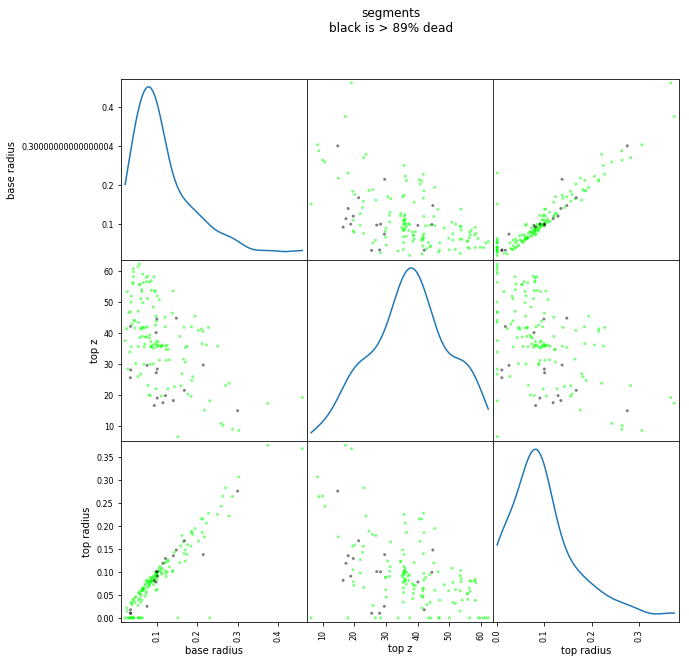

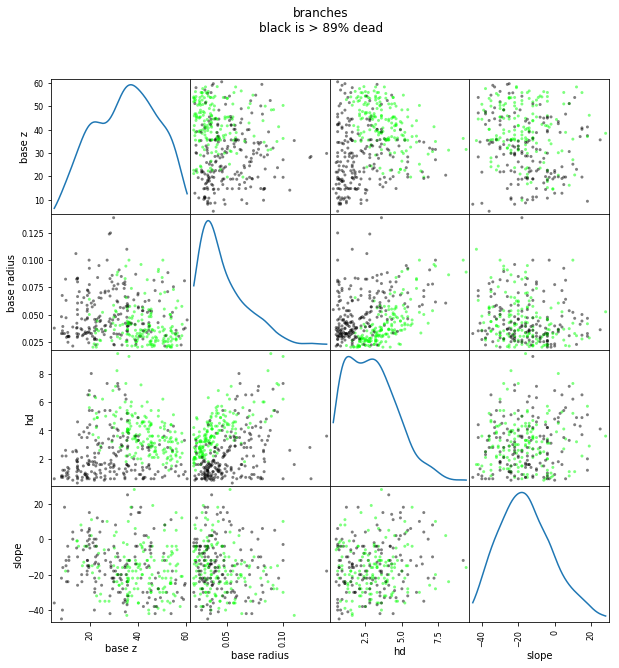

In [14]:
#Enter scatterplots here, maybe look for something that doesn't require matplotlib
if suppressScatter == False:
    color_wheel = {1: "#00ff00",
                   2: "#000000"}
    if mapType == 'segment map' or mapType == 'full map':
        colors = treeData['segments']['% dead'].map(lambda x: color_wheel.get(1) if x < 89 else color_wheel.get(2))
        if len(treeData['segments']) > 1:
            scatter_matrix(treeData['segments'][['base z', 'base radius', 'top z', 'top radius']], figsize=(10,10), color=colors, alpha=0.5, diagonal='kde')
            plt.suptitle('segments\nblack is > 89% dead')
            plt.show()
        else:
            print('There is only one segment so no scatter matrix for segments was produced')

    colors = treeData['branches']['% dead'].map(lambda x: color_wheel.get(1) if x < 89 else color_wheel.get(2))
    if treeData['branches']['base z'].dtype == 'O': #if it is formatted as a string
        treeData['branches']['base z'] = treeData['branches']['base z'].astype(dtype = float)
    scatter_matrix(treeData['branches'][['base z', 'base radius', 'hd', 'slope']], figsize=(10,10), color=colors, alpha=0.5, diagonal='kde')
    plt.suptitle('branches\nblack is > 89% dead')
    plt.show()
    plt.close()

In [15]:
treeData, noteColChanges = impF.renameNotesCol(treeData, treeName, newname=noteColChanges['oldNoteName'])

In [16]:
impF.excelExport(treeData, outPath, treeName)

### Produce tree visualization

If this portion does not produce a tree rendering then there are errors in the input data. Check the error logs in the "SitchensisOutputs" folder. 

In [17]:
import vPythonFunctions as pf

In [ ]:
scene = vp.canvas(title='Tree: {0}'.format(treeName), width=800, height=800, center=vp.vec(0,0,50), background=vp.color.white, fov = 0.01, range = 60, forward = vp.vec(-1,0,0), up = vp.vec(0,0,1))
scene.select()

vp.distant_light(direction = vp.vec(1,1,0.5), color = vp.color.white)
vp.distant_light(direction = vp.vec(-1,-1,0.5), color = vp.color.white)

running = True #This allows widgets to dynamically update display (see bottom of code)
cent = 40   #Set the default camera center
shift = 0   #for moving around image
speed = 0  #Set the default rotation speed for the tree
mapChoice = 'full map'

#Define what the widgets will do
def vertSlide(c):  #This controls where the camera points
    global cent
    cent = c.value
def setSpeed(s):  #This controls the rotation speen of the tree
    global speed
    speed = s.value
def treeDisplay(m):  #This controls what parts of the tree are displayed
    global trunk, segments, branches, mapChoice, radBut, labelButton
    
    #clear labels if they are shown and set variable "labsChecked" to reset at end
    if radBut.checked == True:
        radBut.checked = False
        labelButton(radBut)
        labsChecked = True
    else:
        labsChecked = False
    
    if m.selected == 'trunk map':
        trunk.visible = True
        segments.visible = False
        for branch in branches:
            branch.visible = False
    elif m.selected == 'segment map':
        trunk.visible = True
        segments.visible = True
        for branch in branches:
            branch.visible = False
    elif m.selected == 'full map':
        trunk.visible = True
        #if there are segments plot them otherwise skip
        segments.visible = True
        for branch in branches:
            branch.visible = True
    #reset mapChoice, selects item in list and passes correct lebels to section below
    mapChoice = m.selected
    #reset labels if they were on previously
    if labsChecked == True:
        radBut.checked = True
        labelButton(radBut)


def labelButton(r): #This controls whether or not to display labels
    global trunkLabs, segLabs,brLabs, mapChoice
    if r.checked == True:
        if mapChoice == 'trunk map':
            for label in trunkLabs:
                label.visible = True
            for label in segLabs:
                label.visible = False
            for label in brLabs:
                label.visible = False
        elif mapChoice == 'segment map':
            for label in trunkLabs:
                label.visible = False
            for label in segLabs:
                label.visible = True
            for label in brLabs:
                label.visible = False
        elif mapChoice == 'full map':
            for label in trunkLabs:
                label.visible = False
            for label in segLabs:
                label.visible = False
            for label in brLabs:
                label.visible = True
           #I need conditions in here for trees without segments or without branches
    elif r.checked == False:
        for label in trunkLabs:
            label.visible = False
        for label in segLabs:
            label.visible = False
        for label in brLabs:
            label.visible = False
   
#Setup widgets (Horizontal slider, menu, and radio button). Different widgets are bound to functions in vPythonFunctions.py
scene.caption = "\nVary the rotation speed:\n"
hsl = vp.slider(pos = scene.caption_anchor, min = 0, max = 500, value = 0.001, length = 800, bind=setSpeed, right=15)
scene.append_to_caption('\nSelect the tree map to display\n')     
scene.append_to_caption('           ')

#There needs to be a condition here to eliminate options if a tree has no segments or no branches
if mapType == "trunk map":
    mapChoices = vp.menu(choices=['trunk map'], selected = 'trunk map',index = 0, bind=treeDisplay )
elif mapType == "trunk and branch map":
    mapChoices = vp.menu(choices=['trunk map', 'full map'], selected = 'full map',index = 1, bind=treeDisplay )
elif mapType == "trunk and segment map":
    mapChoices = vp.menu(choices=['trunk map', 'segment map'], selected = 'segment map',index = 1, bind=treeDisplay )
elif mapType == "full map":
    mapChoices = vp.menu(choices=['trunk map', 'segment map', 'full map'], selected = 'full map', index = 2, bind=treeDisplay )
scene.append_to_caption('                 ')              
radBut = vp.radio(bind=labelButton, text='display labels') # text to right of button

scene.append_to_caption('            Scroll to zoom, shift + left click to pan!\n')   

###Maybe make a button that moves tree back to zero rotation.####

colors = {'trunk':vp.color.black,'segments':vp.color.red,'branches':vp.color.green, 'dead':vp.color.gray(0.2)}
#mapType = 'full map'

#This is where we decide what to plot: I could add in an option here to not make visible those portions that are not initiall selected. 
trnk, trunkLabs = pf.plotFrusta(treeData, 'trunk', colors) #trunkSpheres,, trunkLabs
trunk = vp.compound(trnk, texture = vp.textures.wood_old, visible = True)

if mapType == 'segment map' or mapType == 'full map':
    sgmnts, segLabs = pf.plotFrusta(treeData, 'segments', colors) #segSpheres,
    segments = vp.compound(sgmnts, visible = True)  #Take a look at the branches code below, I may have to do that for trees with more than 250 segments. 
if mapType == 'trunk and branch map' or mapType == 'full map': 
    brnchs, brLabs = pf.plotFrusta(treeData, 'branches', colors) # brSpheres,     
    mid = round(len(brnchs)/2)
    end = len(brnchs)
    br1 = vp.compound(brnchs[0:mid], visible = True)   #I split up branches into two objects instead of one so they don't exceed the display limits of webGl. This require loops in the rotation and display sections of the code for branches to alter each object in the list. 
    br2 = vp.compound(brnchs[mid:end], visible = True)
    branches = [br1,br2]
    #branches = vp.compound(brnchs, visible = True)
    
#Draw axes
pf.axes((-5,-5,0))

#This allows dynamic updating based on widgets
while True:
    vp.rate(100)
    if running:
        trunk.rotate(angle=speed*1e-4, axis=vp.vec(0,0,1), origin=vp.vector(0,0,0)) 
        for tr in trunkLabs:
            tr.rotate(angle=speed*1e-4, axis=vp.vec(0,0,1), origin=vp.vector(0,0,0))
        if mapType == 'segment map' or mapType == 'full map':
            segments.rotate(angle=speed*1e-4, axis=vp.vec(0,0,1), origin=vp.vector(0,0,0))
            for seg in segLabs:
                seg.rotate(angle=speed*1e-4, axis=vp.vec(0,0,1), origin=vp.vector(0,0,0))
        if mapType == 'trunk and branch map' or mapType == 'full map': 
            for branch in branches:
                branch.rotate(angle=speed*1e-4, axis=vp.vec(0,0,1), origin=vp.vector(0,0,0))
            for br in brLabs:
                br.rotate(angle=speed*1e-4, axis=vp.vec(0,0,1), origin=vp.vector(0,0,0))

<IPython.core.display.Javascript object>